# EX01 A. Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia ...

# Carga de datos

In [104]:
import pandas as pd

In [105]:
face_thai = pd.read_csv('Publicacions Facebook Thailandia.csv', sep=',', encoding='utf-8')

Comenzamos haciendo una exploración general de los datos:

In [106]:
face_thai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Vemos como los datos en conjunto nos dan una descripción de las publicaciones sobre Tailandia hechas en facebook, indicando tipo de publicación, fecha, número de reacciones a la publicación y tipo de reacción.

# Limpieza de datos:

In [107]:
face_thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

En cuanto al tipo de las columnas, dentro de las 16 existentes, 3 son de tipo object, 9 de tipo entero y 4 coma flotante. Las 12 primeras no contienen nulos y las cuatro de coma flotante sólo contienen nulos. En total 7050 registros.

In [108]:
objects = ['status_id','status_type','status_published']

for i in objects:
  print(face_thai[i].dtypes)

object
object
object


In [109]:
for i in objects:
  print(face_thai[i].apply(type).unique())

[<class 'str'>]
[<class 'str'>]
[<class 'str'>]


Más específicamente el tipo de las columnas object es string.

Lo primero que vamos a hacer va a ser eliminar las cuatro `Column`, ya que sólo contienen nulos y no nos aportan información.



In [110]:
face_thai = face_thai.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [111]:
face_thai.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

Ya tenemos face_thai sin columnas nulas.

En segundo lugar, vamos a comprobar los registros duplicados:

In [112]:
face_thai.duplicated().value_counts()

False    6999
True       51
dtype: int64

Existen 51 registros duplicados, que vamos a eliminar ...

In [113]:
face_thai = face_thai.drop_duplicates()
face_thai.duplicated().value_counts()

False    6999
dtype: int64

In [114]:
face_thai.shape

(6999, 12)

Para quedarnos con 6999 filas y 12 columnas, ahora ya sin valores nulos ni duplicados.

Llegados a este punto también podemos eliminar status_id, que no nos aporta información que necesitemos para nuestro análisis:

In [115]:
face_thai = face_thai.drop('status_id', axis=1)

# Descripción estadística de los datos:

La descripción estadística la adaptaremos según la naturaleza de las columnas y el tipo de datos que contienen. Vamos con ello:

Empezando por `status_type`, el tipo de contenido de la publicación:

In [116]:
face_thai.status_type.value_counts()

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

Tenemos cuatro tipos de contenido: foto, vídeo, status y links, predominando las fotografías: 4244, y los vídeos: 2333, de entre el total de 6999 registros.

Seguimos con las `status_published` (fechas):

In [117]:
face_thai['status_published'] = pd.to_datetime(face_thai['status_published'])

Convertimos el tipo de dato de la columna a fechas, para poder extraer los años de manera fácil:

In [118]:
face_thai.status_published.dt.year.value_counts()

2018    2499
2017    2253
2012     589
2016     588
2013     500
2015     337
2014     233
Name: status_published, dtype: int64

... y vemos como todas las publicaciones se sitúan entre 2014 y 2018, predominando las publicaciones para los dos últimos años: 2017 (2253) y 2018 (2499).

Las columnas de tipo int las parametrizamos con describe():

In [119]:
enteras = []

for x in face_thai:
  if (face_thai[x].dtypes == 'int64'):
    enteras.append(x)

face_thai[enteras].describe().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00
mean,224.99,225.55,40.26,209.95,12.75,1.25,0.70,0.23,0.11
std,452.88,892.74,132.05,439.55,40.11,8.73,3.97,1.48,0.69
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00
50%,58.00,4.00,0.00,57.00,0.00,0.00,0.00,0.00,0.00
75%,216.00,22.00,4.00,182.00,3.00,0.00,0.00,0.00,0.00
max,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00


Vemos como el número medio de reacciones por publicación es de 225, de entre las cuales en media y redondeando 210 son likes, 13 loves, 1 wows, 1 hahas, 0 angrys y 0 sads. Mientras la media de comentarios está en 226, con rango entre 0 y 20990, con sesgo positivo y mediana en 4 comentarios por publicación. El nº de shares tiene la media en 40, pero la mediana en 0, de nuevo con sesgo positivo.  
· En general la distribución es parecida para todas las características de reacción y podemos ver como parece haber una diferencia muy significativa entre algunas publicaciones, muy populares, y las demás, lo que explica los sesgos hacia la derecha.  
· Una segunda lectura es que el número de reacciones de carácter positivo es muy superior al número de reacciones de carácter negativo (sads y angrys), prácticamente testimoniales.

# Transformación de los datos:

Primero un breve recordatorio:

In [120]:
face_thai.head(1)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0


Estructura.

In [121]:
for x in face_thai:
  print(x+': '+str(face_thai[x].apply(type).unique()))

status_type: [<class 'str'>]
status_published: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
num_reactions: [<class 'int'>]
num_comments: [<class 'int'>]
num_shares: [<class 'int'>]
num_likes: [<class 'int'>]
num_loves: [<class 'int'>]
num_wows: [<class 'int'>]
num_hahas: [<class 'int'>]
num_sads: [<class 'int'>]
num_angrys: [<class 'int'>]


Tipo de datos.

| Tipo de Dato                | Condición           | Transformación Recomendada |
|-----------------------------|---------------------|---------------------------|
| Datos con Distribución Gaussiana | -                 | `StandardScaler`          |
| Datos con Distribución No Gaussiana | Sin Outliers   | `MinMaxScaler`            |
| Datos con Distribución No Gaussiana | Con Outliers   | `RobustScaler`            |
| Categóricas sin Jerarquía    | -                   | `OneHotEncoder` / `pd.get_dummies()` |
| Categóricas con Jerarquía    | -                   | `LabelEncoder`            |


Tipo de transformaciones adecuadas según la distribución de cada característica.

Vamos primero a comprobar si existe alguna columna gaussiana de entre las enteras:

In [122]:
from scipy.stats import shapiro
for entera in enteras:
  stat, p = shapiro(face_thai[entera])
  if p > 0.05:
    print(entera+': Gaussiana'+f' - p={p:.3f}')
  else:
    print(entera+': No gaussiana'+f' - p={p:.3f}')

num_reactions: No gaussiana - p=0.000
num_comments: No gaussiana - p=0.000
num_shares: No gaussiana - p=0.000
num_likes: No gaussiana - p=0.000
num_loves: No gaussiana - p=0.000
num_wows: No gaussiana - p=0.000
num_hahas: No gaussiana - p=0.000
num_sads: No gaussiana - p=0.000
num_angrys: No gaussiana - p=0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


:No hay ninguna columna que siga una distribución normal. Sigamos con los valores extremos:

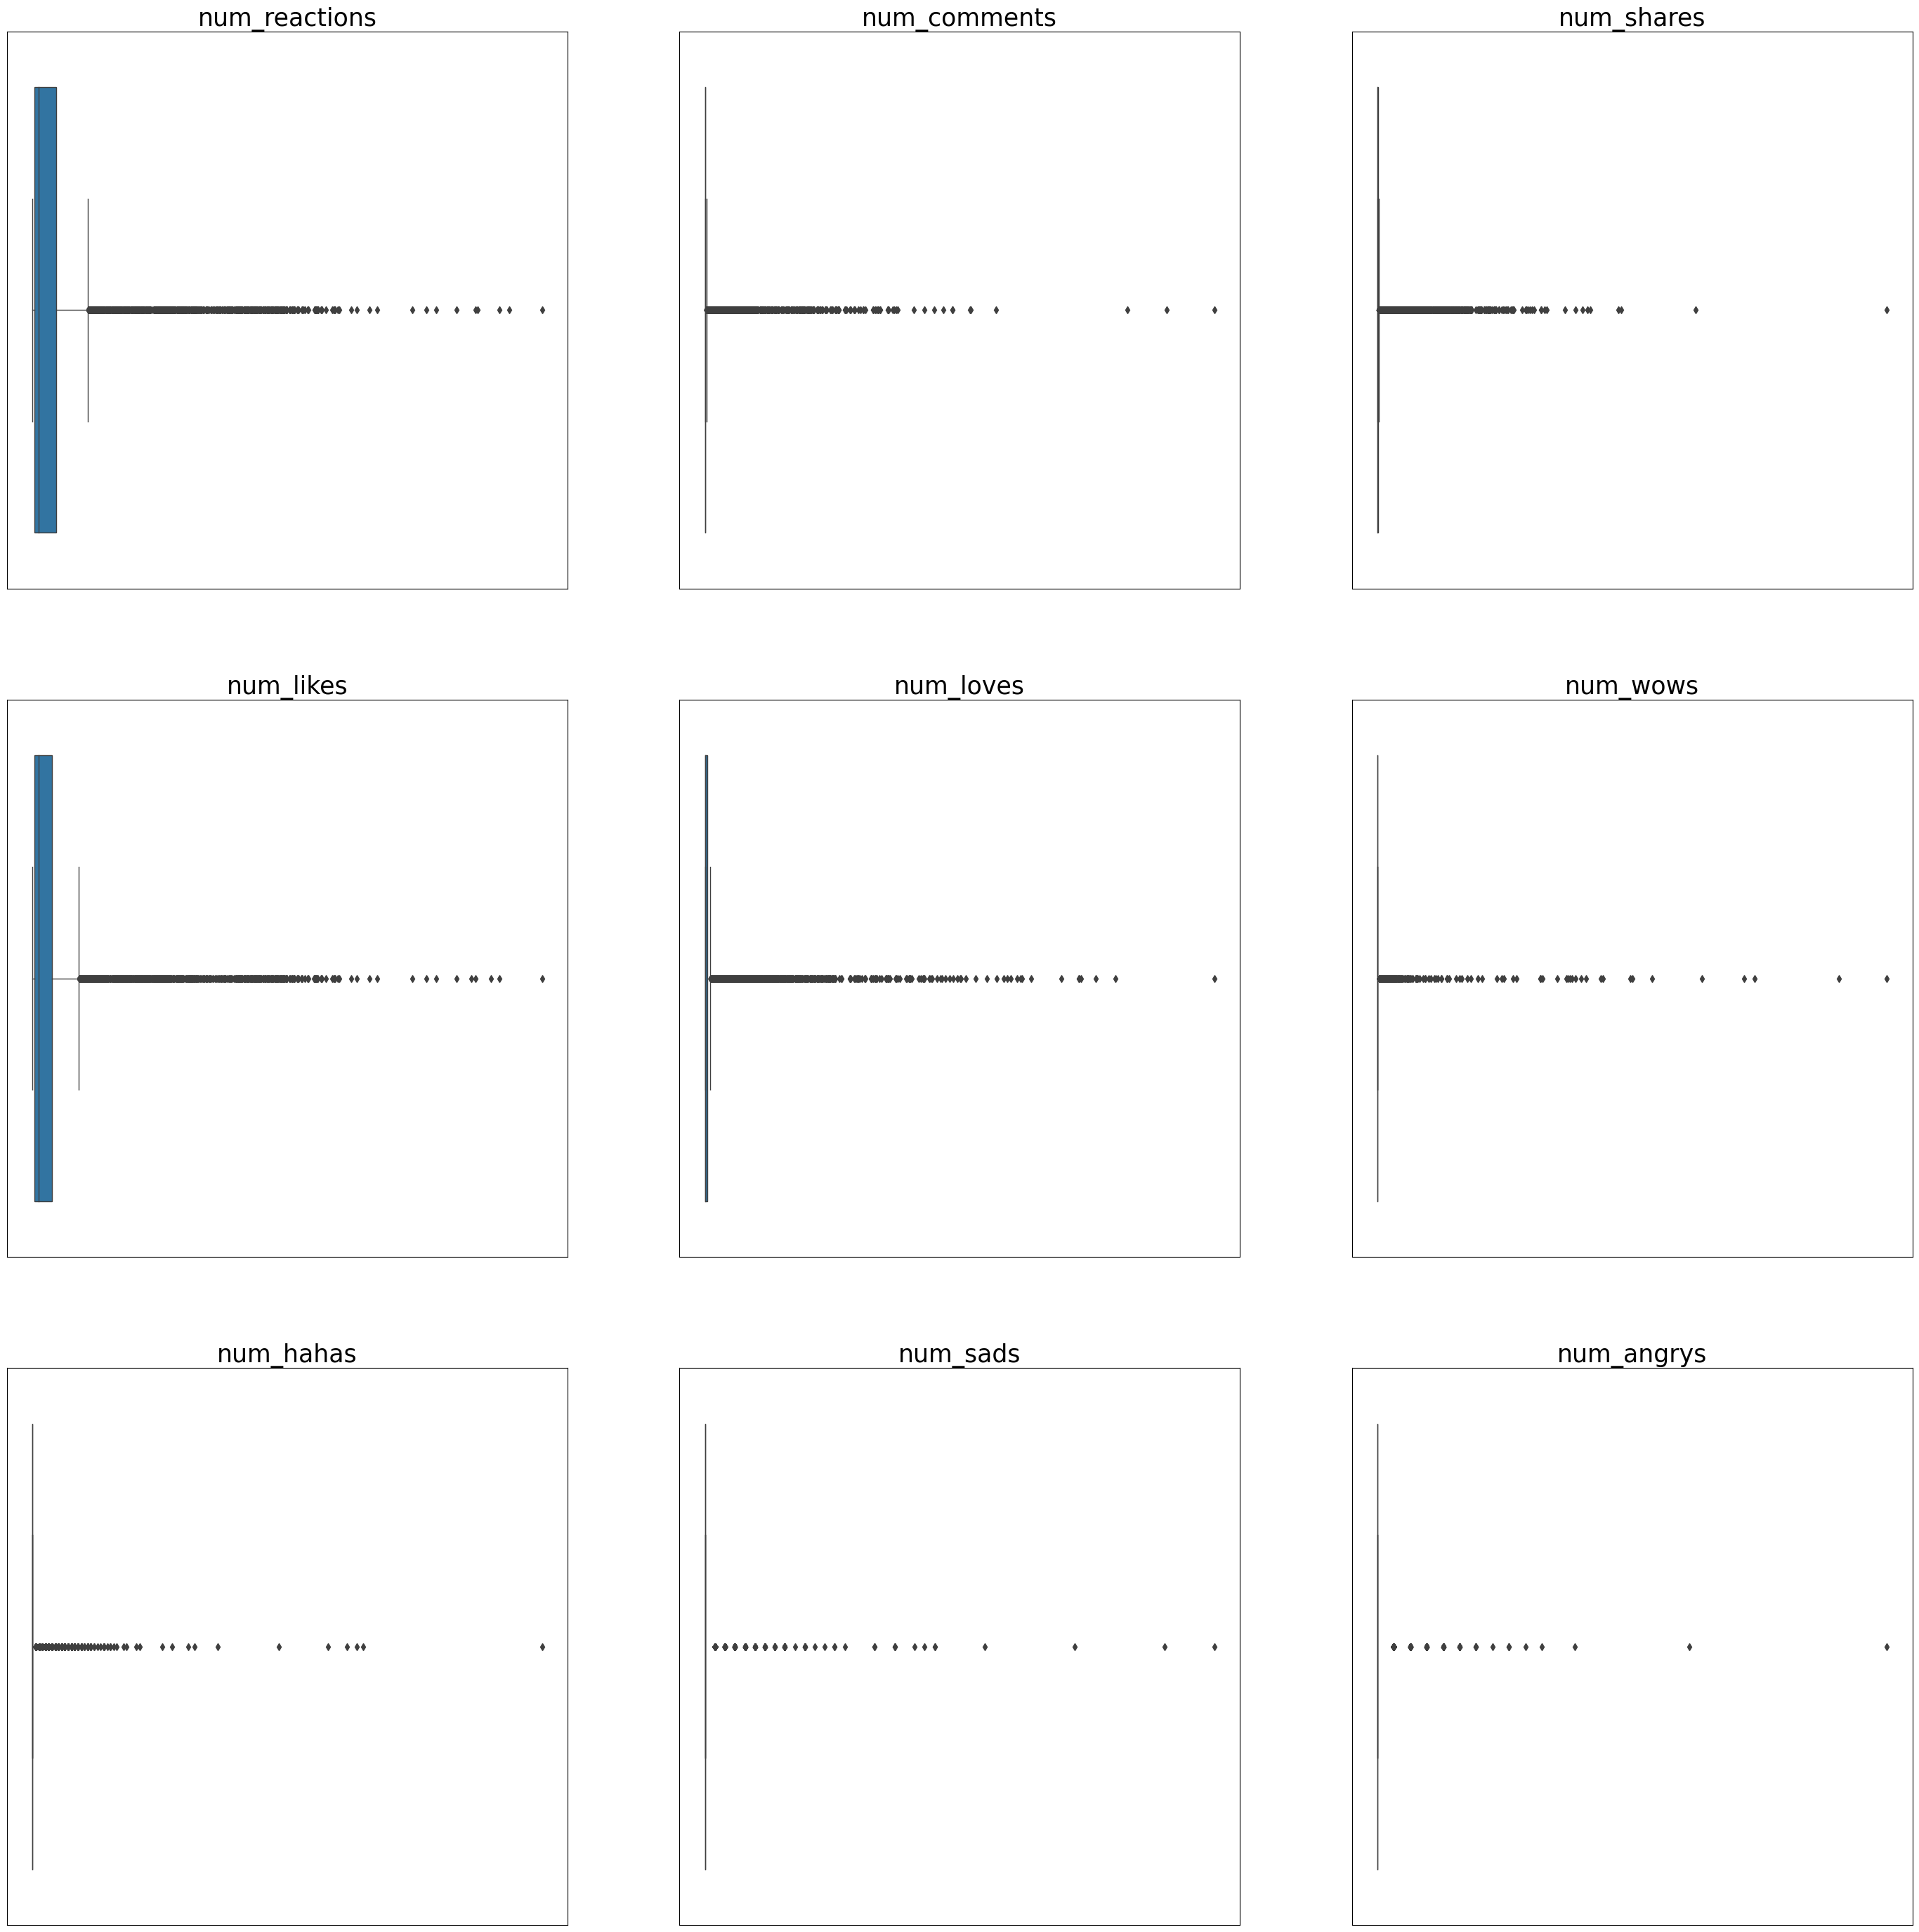

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(35, 35))
axes = axes.flatten()

i = 0

for e in enteras:
  sns.boxplot(face_thai[e], ax=axes[i], orient='h')
  axes[i].set_title(e, fontsize=25)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  i +=1

Todas las columnas de tipo entero contienen outliers, y por lo tanto aplicamos `RobustScaler`:

In [124]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

for e in enteras:
  face_thai[e] = scaler.fit_transform(face_thai[[e]])

Mientras que a la columna `status_type` le aplicaremos one-hot encoder, para convertirla en cuatro variables dummy.

In [126]:
from sklearn.preprocessing import OneHotEncoder

scaler = OneHotEncoder()

tipos = scaler.fit_transform(face_thai[['status_type']])
tipos_df = pd.DataFrame(tipos.toarray(), columns=scaler.get_feature_names_out(['status_type']))
face_thai = face_thai.join(tipos_df).drop('status_type', axis=1)

In [136]:
face_thai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_reactions       6999 non-null   int64
 1   num_comments        6999 non-null   int64
 2   num_shares          6999 non-null   int64
 3   num_likes           6999 non-null   int64
 4   num_loves           6999 non-null   int64
 5   num_wows            6999 non-null   int64
 6   num_hahas           6999 non-null   int64
 7   num_sads            6999 non-null   int64
 8   num_angrys          6999 non-null   int64
 9   status_type_link    6999 non-null   int64
 10  status_type_photo   6999 non-null   int64
 11  status_type_status  6999 non-null   int64
 12  status_type_video   6999 non-null   int64
 13  year                6999 non-null   int64
 14  month               6999 non-null   int64
 15  day                 6999 non-null   int64
 16  hour                6999 non-null   int64


Ahora ya tenemos `status_type` convertida en dummies y desglosada en 4 columnas.

Nos queda la variable `status_published`, la cual desagrupamos en 5 columnas correspondientes al año, mes, día hora y día de la semana de la publicación:

In [129]:
face_thai['year'] = face_thai.status_published.dt.year
face_thai['month'] = face_thai.status_published.dt.month
face_thai['day'] = face_thai.status_published.dt.day
face_thai['hour'] = face_thai.status_published.dt.hour
face_thai['dayofweek'] = face_thai.status_published.dt.dayofweek

Ya podemos eliminar la columna `status_published`:

In [130]:
face_thai = face_thai.drop('status_published', axis=1)

Veamos lo que tenemos hasta aquí ...

In [131]:
face_thai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       6999 non-null   float64
 1   num_comments        6999 non-null   float64
 2   num_shares          6999 non-null   float64
 3   num_likes           6999 non-null   float64
 4   num_loves           6999 non-null   float64
 5   num_wows            6999 non-null   float64
 6   num_hahas           6999 non-null   float64
 7   num_sads            6999 non-null   float64
 8   num_angrys          6999 non-null   float64
 9   status_type_link    6999 non-null   float64
 10  status_type_photo   6999 non-null   float64
 11  status_type_status  6999 non-null   float64
 12  status_type_video   6999 non-null   float64
 13  year                6999 non-null   int64  
 14  month               6999 non-null   int64  
 15  day                 6999 non-null   int64  
 16  hour  

... podemos convertir el tipo de todas las variables a entero (en pos de la eficiencia):

In [132]:
for x in face_thai:
  if face_thai[x].dtype == 'float64':
    face_thai[x] = face_thai[x].astype('int64')

In [133]:
face_thai.dtypes

num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
status_type_link      int64
status_type_photo     int64
status_type_status    int64
status_type_video     int64
year                  int64
month                 int64
day                   int64
hour                  int64
dayofweek             int64
dtype: object

... y listo, ahora ya tenemos todos los datos transformados y solamente las columnas necesarias en nuestro dataset en formato entero.

# PCA

Es el momento de aplicar el análisis de componentes (PCA) para reducir las dimensiones de nuestro dataset `face_thai`

El primer paso es visualizar la varianza explicada del dataset según el nº de componentes utilizados. Se considera que explicar a partir de un 85% de la varianza con los nuevos componentes puede ser suficiente.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

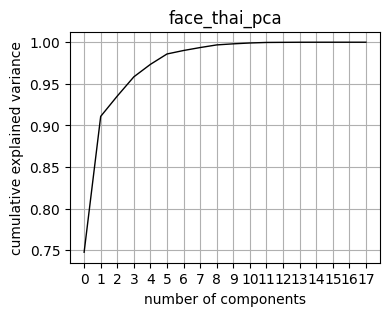

In [143]:
pca = PCA().fit(face_thai)
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(np.cumsum(pca.explained_variance_ratio_), color='black', lw=1)
ax.set_xticks(range(0,18))
ax.set_title('face_thai_pca')
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance');
plt.grid(True)
plt.show()

Podemos observar tanto por 1 de varianza que explica cada componente. Pero necesitamos una medida del total de la varianza explica según el número de componentes que utilicemos:

In [155]:
for x in range(1,11):
  pca = PCA(n_components=x)
  pca_array = pca.fit_transform(face_thai)
  face_thai_pca = pd.DataFrame(data=pca_array)
  face_thai_pca.columns = ['PC' + str(col+1) for col in face_thai_pca.columns.values]
  if (x == 1):
    print(str(x)+' componente: '+str(sum(pca.explained_variance_ratio_).round(3)))
  else:
    print(str(x)+' componentes: '+str(sum(pca.explained_variance_ratio_).round(3)))

1 componente: 0.748
2 componentes: 0.911
3 componentes: 0.935
4 componentes: 0.958
5 componentes: 0.973
6 componentes: 0.986
7 componentes: 0.99
8 componentes: 0.994
9 componentes: 0.997
10 componentes: 0.998


Aquí ya sí podemos ver claramente como es con 2 componentes que podemos explicar más de un 85% de la varianza, y aunque cabría ser más precisos, para el caso es suficiente.

Aplicamos PCA con 2 componentes:

In [157]:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(face_thai)
face_thai_pca = pd.DataFrame(data=pca_array)
face_thai_pca.columns = ['PC' + str(col+1) for col in face_thai_pca.columns.values]

Comprobamos la varianza explicada:

In [159]:
print('Varianza explicada por nuestro PCA: '+str(sum(pca.explained_variance_ratio_).round(3)))

Varianza explicada: 0.911


A modo de muestra, estos son los 5 primeros registros del dataframe que tenemos guardado en face_thai_pca:

In [ ]:
face_thai_pca.head()

,PC1,PC2
0,47.841733,38.941372
1,-14.563902,-2.550567
2,3.010743,3.736632
3,-14.502580,-2.127567
4,-13.902395,-1.317651


Ahora podemos pasar a clasificar los registros (puntos) utilizando el clustering de K-means y jerárquico.

# EX01 B ... i classifica els diferents registres utilitzant l'algorisme de K-means.

# K-means, nº clústers óptimo:

Comenzamos viendo la distribución para tratar de inferir un nº de clústers entorno a los cuales se agrupen los datos:

Text(0, 0.5, 'PC2')

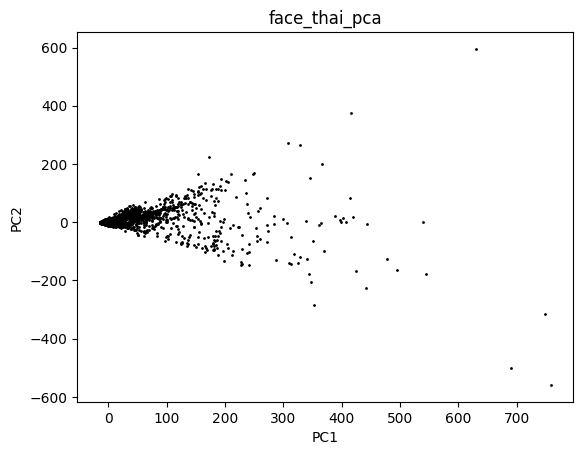

In [ ]:
plt.scatter(face_thai_pca.PC1, face_thai_pca.PC2, s=1, color='black')
plt.title('face_thai_pca')
plt.xlabel('PC1')
plt.ylabel('PC2')

Como podemos comprobar arriba, visualmente es difícil inferir un número de clústers óptimo dada la forma de embudo de la distribución de puntos.

Pero tenemos otra opción, que es iterar K-means para distintos números de clústers y evaluar de acuerdo con un parámetro de rendimiento, en este caso SSE (suma de errores al cuadrado - distancias de los puntos al nodo central de cada clúster elevadas al cuadrado y sumadas):

In [ ]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(face_thai_pca)
    sse.append(kmeans.inertia_)

Ahora que tenemos todos los errores en sse, los podemos mostrar en un gráfico:

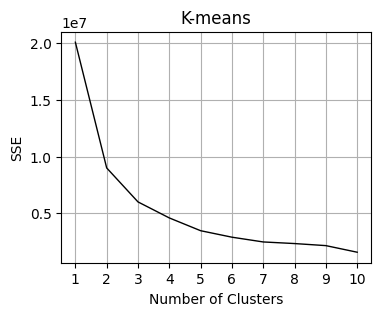

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(range(1, 11), sse, color='black', lw=1)
ax.set_xticks(range(1, 11))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("SSE")
ax.set_title("K-means")
plt.grid(True)
plt.show()

En el gráfico vemos como el punto del codo, que se suele considerar el óptimo para equilibrar número de clústers (cuanto menor mejor), y error SSE (cuando menor mejor), se encuentra parece que en 3 clústers, pero también podría ser el 2 o incluso el 5. Por lo tanto necesitamos todavía un cálculo preciso ...

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

... y lo obtenemos en el paquete kneed, clase KneeLocator, utilizando el método elbow, que nos da el punto exacto del codo, en este caso 3 clústers.

# Clasificación K-means:

Ahora ya estamos en condiciones de aplicar el clústering K-means sobre face_thai_pca:

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=None
)

In [ ]:
cluster_kmeans = kmeans.fit(face_thai_pca)

Ya lo tenemos, vamos a mostrar los nodos centrales de cada clúster:

In [ ]:
print('Punto central de los clústers: '+str(kmeans.cluster_centers_))

Punto central de los clústers: [[ 85.12101941  28.98482397]
 [289.21516252 -51.92756587]
 [-11.61752289  -1.48053371]]


Posteriormente utilizaremos la variable cluster_kmeans para obtener otra medida del rendimiento, como es Silhouette:

# EX02. Classifica els diferents registres utilitzant l'algoritme de clústering jeràrquic.

Para hacer la clasificación jerárquica comenzaremos mostrando los registros en un dendograma:

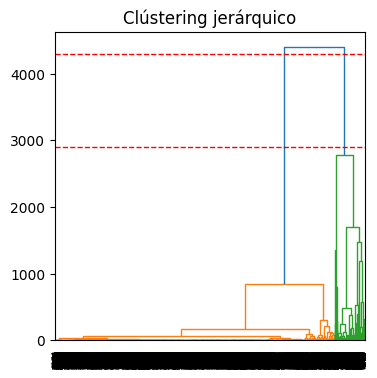

In [ ]:
import scipy.cluster.hierarchy as shc
plt.rcParams['lines.linewidth'] = 1
plt.figure(figsize=(4, 4))
plt.title("Clústering jerárquico")
dend = shc.dendrogram(shc.linkage(face_thai_pca, method='ward'))
plt.axhline(y=4300, color='r', linestyle='--')
plt.axhline(y=2900, color='r', linestyle='--')

Las líneas rojas indican el punto de corte óptimo, que es la distancia vertical máxima entre clústers, por lo tanto sólo viendo el dendograma podríamos inferir que el número óptimo de clústers siguiendo el modelo jerárquico en este caso es 2, número de grupos en que queda dividido el conjunto.

Pero de nuevo hay otra manera de obtener el número óptimo de clústers jerárquicos con silhouette, iterando para valores entre 2 y 10:

In [160]:
silhouette_coefficients = []

for k in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=k)
    clustering.fit(face_thai_pca)
    score = silhouette_score(face_thai_pca, clustering.labels_)
    silhouette_coefficients.append(score)

Mostramos los resultados gráficamente:

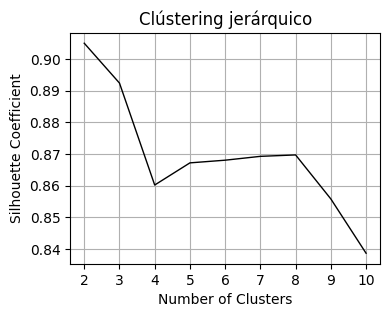

In [161]:
plt.figure(figsize=(4, 3))
plt.plot(range(2, 11), silhouette_coefficients, color='black', lw=1)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Clústering jerárquico')
plt.grid(True)
plt.show()

Podemos ver como en este caso el nº óptimo de clústers sería también 2, que es el que obtiene un coeficiente máximo. Por lo tanto ya podemos hacer el clústering jerárquico:

In [164]:
from sklearn.cluster import AgglomerativeClustering
cluster_jerarquico = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = cluster_jerarquico.fit_predict(face_thai_pca)
np.unique(clusters)

array([0, 1])

Hemos ajustado el modelo con 2 clústers, y luego obtenido el clúster al que pertenece cada registro / observación de las publicaciones en facebook para Tailandia: 0 o 1.

Posteriormente utilizaremos la variable cluster_jerarquico para obtener la medida exacta del rendimiento con Silhouette.

# EX03. Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Obtenemos el rendimiento de los dos tipos de clústering aplicados en los ejercicios 1 y 2 con Silhouette:

In [165]:
score = silhouette_score(face_thai_pca, cluster_kmeans.labels_).round(3)
print('Silhouette kmeans con 3 clústers: '+str(score))

Silhouette kmeans con 3 clústers: 0.875


In [167]:
score = silhouette_score(face_thai_pca, cluster_jerarquico.labels_).round(3)
print('Silhouette jerárquico con 2 clústers: '+str(score))

Silhouette jerárquico con 2 clústers: 0.905


Vemos como el rendimiento Silhouette es algo superior para el clústering jerárquico de 3 grupos, 0.905, frente a 0.875 para el sistema K-means.

Finalmente, y como resumen, en la práctica hemos tratado con los datos contenidos en el archivo `Publicacions Facebook Thailandia`, referentes a las publicaciones en facebook sobre Tailandia en el rango de años 2012 - 2018, primero describiéndolos, en segundo lugar transformándolos, en tercer lugar reduciendo las dimensiones y finalmente separándolos en 3 grupos y 2 grupos, utilizando tanto `K-means` como el clústering jerárquico de `AgglomerativeClustering`, para finalmente evaluar el rendimiento de ambas aproximaciones con Silhouette y comprobando como el rendimiento es algo superior utilizando el clústering jerárquico (0.905 frente a 0.875), si bien ambos rendimientos se pueden considerar altos.